<a href="https://colab.research.google.com/github/PixelatedLatte/MachineLearningProjects/blob/main/DiabetesScreeningLCMBlankenship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 460G: Machine Learning
## Spring 2026
## Assignment 1

___


**Double click on this cell and write your name/UK ID/email.**

Name: Jacob Blankenship

ID: 912676349

Email: jrbl245@uky.edu

# READ THIS FIRST

## Reminder on what's up for you in this assignment

This is one of the three assignments. A maximum of 100 points are available from this assignment. You will need to use your learning from the first 2 weeks' lectures.

You will turn in completed version of this notebook (both ipynb and pdf files). Your submission will be graded under 3 major criteria:

  * Functional code: Completed code with every piece functional
  * Correctness: Your submitted notebook contains correct code that gives accurate results unless otherwise stated
  * Documentation: Every cell is well-documented and easy-to-follow to reproduce the results

$~$

## Reproducibility in iPython Notebooks

As you have noticed, iPython notebooks are interactive Python sessions that allow us to spread our code, text, and markdown seamlessly.

Every word you read and write is modifiable. You can double click this cell to change the text you're reading now. You will use such cells to write your answers/code.

Don't forget to double click the first cell, and write your name, ID, and email.

Cells can be added for code or text. Check the top left corner: "+Code" to add a new cell for writing code and "+Text" to add a new cell for raw texts.

The best thing about notebooks is that you can quickly run small components of your code in separate cell to make sure they work before putting together for a larger component. Another good thing is, as you noticed during our in-class hands-on, the entire assignment self-contained in this ipynb file. So, you can put all your functions and classes into the cells of this notebook. Please make sure your code is written cleanly with documentation (how to use your work once completed, to reproduce the exact same results). Once you're done, download the notebook as ipynb file and submit on Canvas before the due date. Please also make sure to download the PDF file when everything works fine: File-->Print-->Save as PDF

Please be reminded, it is important to write readable and reproducible code. Let's take a small fine step towards that goal, with this notebook.

## **Linear Classification: Data Preparation, Linear Machine Learning Algorithm & Evaluation**

---

For this experiment, we use Diabetes Screening Dataset from Kaggle. The dataset can be accessed from https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset. There are in total 100,000 samples in the dataset. There are eight different features (age, gender, hypertension,  smoking history, heart_disease, bmi, HbA1c_level, blood_glucose_level) and the corresponding Diabetes label (positive/negative) for each of the samples. These features can be taken as inputs to train a machine learning algorithm to map them to target Diabetes status (0/1) outputs.

For simplicity, the non-numeric features (gender and smoking history) have been removed. The modified dataset can be accessed at [diabetes dataset](https://drive.google.com/file/d/1cfc8QVGXdf1EVhW_A_dROHGFmq8n2aTZ/). You should download and upload to your google drive.


You need to use the Linear Model (Logistic Regression) discussed in the W2L2 lecture. Then evaluate the model performance using some performance metrics. Please feel free to use any code provided in the *Linear-Classification.ipynb* Colab notebook.

### Dataset Preparation (30 points)

#### First we load the dataset and try to understand it   

#### To Do:

<ul>Load the Diabetes dataset from directory</ul>
<ul>Get the features and corresponding class labels</ul>
<ul>Verify the shape of the features and labels</ul>


Remember, you need to mount google drive for read/write access. Then you can read the CSV file from your drive using Pandas.

In [1]:
#To Do: Mount your google drive directory

# https://www.geeksforgeeks.org/data-science/how-to-load-a-dataset-from-the-google-drive-to-google-colab/
# ^ Side used for code on how to mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read the data

---


#### Understand it: check, analyze, visualize

In [3]:
import pandas as pd
#To Do: Use pd.read_csv to read the CSV file from given filepath
ScreeningDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDatasets/DiabetesScreening.csv')



In [4]:
#To Do: Check the keys
ScreeningDataset.keys()

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Display the entire diabetes dataset and check the shape.

In [5]:
#To Do: First we extract the 'features' and 'target' from the dictionary
features = ScreeningDataset.drop('diabetes', axis = 1)
labels = ScreeningDataset['diabetes']

In [7]:
#To Do: check the shapes of features and labels
features.shape, labels.shape

((100000, 6), (100000,))

In [8]:
#To Do: Display features
features
labels

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [9]:
features['bmi'].quantile([0.25,0.5,0.75]), features['bmi'].max()
# Checking distributions since a bmi of 95 is insane

(0.25    23.63
 0.50    27.32
 0.75    29.58
 Name: bmi, dtype: float64,
 95.69)

Text(0, 0.5, 'Count')

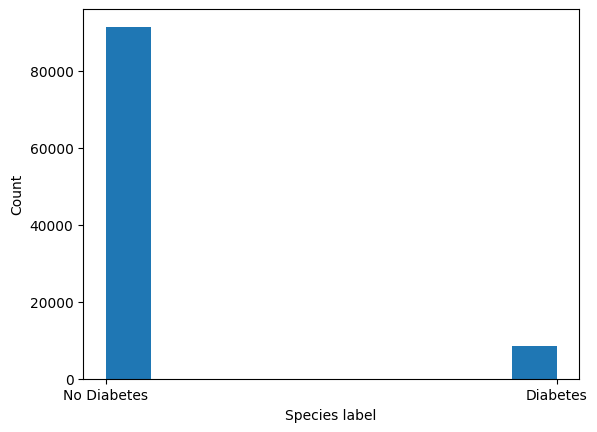

In [10]:
#To Do: Check the label distribution
plt.hist(labels)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Species label')
plt.ylabel('Count')

Distribution Findings: *It is clear that the majority of our 100k sample do not have diabetes, with a ~90-10 split between no diabetes compared to diabetes.*

Now, let's do some plots to better understand the dataset. We can create scatter plot of the dataset by taking any two features at a time (e.g., bmi and HbA1c_level) and see if there is any recognizable pattern.

Text(0.5, 1.0, 'Diabetes vs No Diabetes when comparing HbA1c levels and BMI')

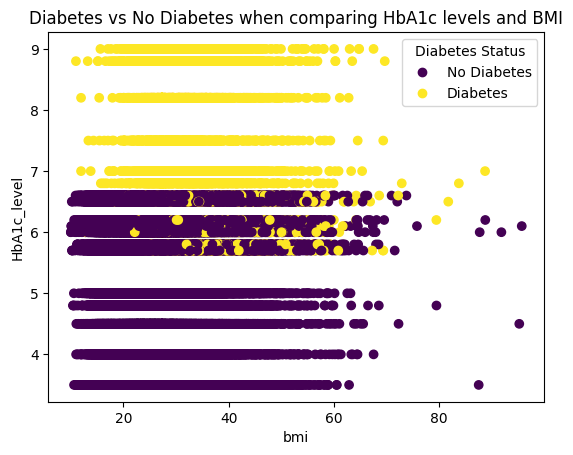

In [11]:
#To Do: Create a Scatter plot (bmi, HbA1c_level) with the class labels
#The plot should be properly annotated
plt.subplots()
scatter = plt.scatter(features.iloc[:, 3], features.iloc[:, 4], c=labels)
plt.xlabel(features.columns[3])
plt.ylabel(features.columns[4])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Diabetes vs No Diabetes when comparing HbA1c levels and BMI")


### Train and evaluate using any two features (30 points)

We can first attempt to build our linear model using any two features to see how the model performs on a test set.

Text(0.5, 1.0, 'Diabetes vs No Diabetes when comparing HbA1c levels and Blood Glucose Levels')

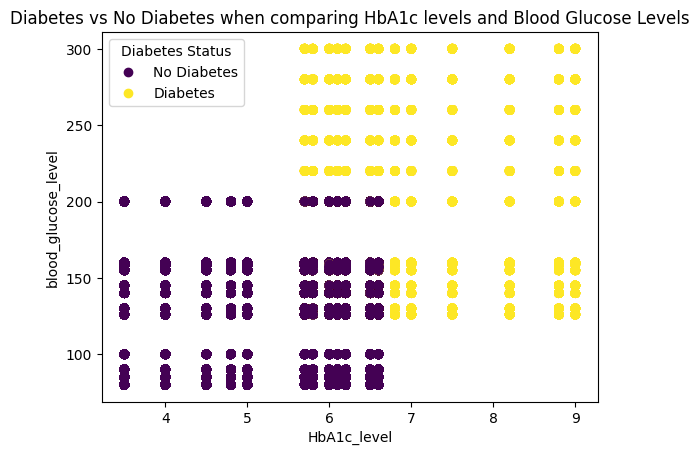

In [12]:
#To Do: Select any two features only, for model training and evaluation
plt.subplots()
scatter = plt.scatter(features.iloc[:, 4], features.iloc[:, 5], c=labels)
plt.xlabel(features.columns[4])
plt.ylabel(features.columns[5])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Diabetes vs No Diabetes when comparing HbA1c levels and Blood Glucose Levels")



In [13]:
#To Do: Verify the shapes
X = features.iloc[:,0:2]
Y = labels

#Verify the shape
X.shape, Y.shape


((100000, 2), (100000,))

#### Split into Training and Testing

---

#### The general approach to evaulate any machine learning model is to split your data into train and test subsets: former subset is to train and the latter to test the trained model. In a standard split, 75% data are used in training and 25% for testing.

#### To Do:
<ul>Use the train_test_split function from scikit-learn.model_selection to split into train and test sets.</ul>

In [14]:
from sklearn.model_selection import train_test_split

#To Do: Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(features.iloc[:,4:6], labels, test_size=0.25)


#To Do: Check the shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
X_train, X_test, Y_train, Y_test

(       HbA1c_level  blood_glucose_level
 23720          5.8                  145
 94204          6.5                  126
 81619          4.0                   90
 22944          3.5                   85
 26017          6.5                  160
 ...            ...                  ...
 98906          4.8                  160
 7827           4.8                  130
 20305          6.6                   90
 12235          5.8                  160
 48746          6.6                   90
 
 [75000 rows x 2 columns],
        HbA1c_level  blood_glucose_level
 82661          3.5                  126
 11980          3.5                   85
 93421          4.8                  100
 94337          6.1                   85
 93151          6.6                  100
 ...            ...                  ...
 38333          5.0                  130
 72121          6.5                   80
 23690          5.8                  126
 22375          6.0                  100
 90088          6.0         

In [15]:
#To Do: Check the label distribution for both train and test sets

# Link on how to access the index of the DF and Series:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html
pd.DataFrame(X_train.index).quantile([0.25, 0.5, 0.75]), pd.DataFrame(X_test.index).quantile([0.25, 0.5, 0.75]),pd.Series(Y_train.index).quantile([0.25, 0.5, 0.75]), pd.Series(Y_test.index).quantile([0.25, 0.5, 0.75])

DiabetesTrainProp = Y_train.sum() / 75000
DiabetesTestProp = Y_test.sum() / 25000
DiabetesDatasetProp = labels.sum() / 100000
print((f"""Positive Diabetes Proportion for Total/Train/Test datasets: \n{DiabetesTestProp}
{DiabetesTestProp}\n{DiabetesDatasetProp}"""))

# First step looked at the indices for train + test to see that sampling was random
# Second step calculated the proportion of positive labels (Diabetes) for datasets, which were similar



Positive Diabetes Proportion for Total/Train/Test datasets: 
0.08328
0.08328
0.085


#### Linear Classification Algorithm

---

#### You can easily get this classifier from scikit-learn. For every classifier model, fit with the training data (features and targets). Then make predictions for the test data (features).

#### Obtain the predictions for the following classification algorithms:

<li>Linear model: Logistic Regression</li>

#### To Do:
<ul>Load the classifiers from sklearn</ul>
<ul>For every classifier,
  <ul>build the model</ul>
  <ul>Fit the model with the training data set</ul>
  <ul>Make prediction on the test data set</ul>
</ul>

Check the documentation at
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression for LR for example, and understand different parameters you can pass to the model. Here, we take the default setting

In [16]:
#To Do: Load the classifier from scikit-learn and then perform training and testing
from sklearn.linear_model import LogisticRegression

DiabetesRegression = LogisticRegression().fit(X_train, Y_train)
Y_prediction = DiabetesRegression.predict(X_test)
Y_prediction
DiabetesRegression.score(X_test, Y_test)

0.95484

#### Decision Boundary

Since we are dealing with a classification problem containing only 2 features, it is then possible to observe the decision function boundary. The boundary is the rule used by our predictive model to affect a class label given the two feature values of the sample.

Text(0.5, 1.0, 'Predicted Diabetes vs No Diabetes when comparing\n HbA1c levels and Blood Glucose Levels (Test Data Only)')

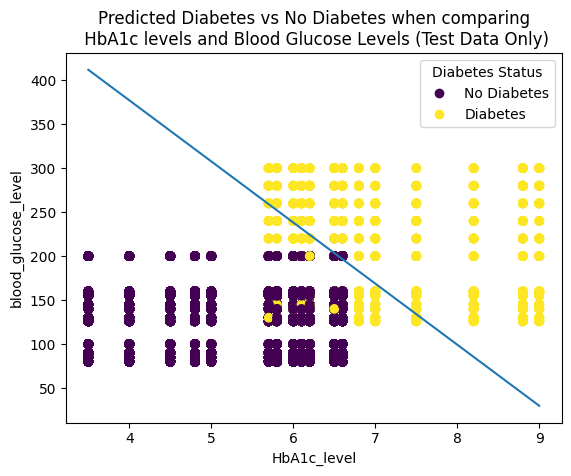

In [17]:
#To Do: Display the decision boundary and show train/test data points with class labels

Intercept = DiabetesRegression.intercept_
Coefficent = DiabetesRegression.coef_
plt.scatter(X_test.HbA1c_level, X_test.blood_glucose_level, c = Y_test)
predictionLineX = np.linspace(X_test.iloc[:,0].min(), X_test.iloc[:,0].max(), 1000)
predictionLineY = -(Coefficent[0][0]*predictionLineX + Intercept) / Coefficent[0][1]
plt.plot(predictionLineX, predictionLineY)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Predicted Diabetes vs No Diabetes when comparing\n HbA1c levels and Blood Glucose Levels (Test Data Only)")


Text(0.5, 1.0, 'Predicted Diabetes vs No Diabetes when comparing\n HbA1c levels and Blood Glucose Levels (Train Data Only)')

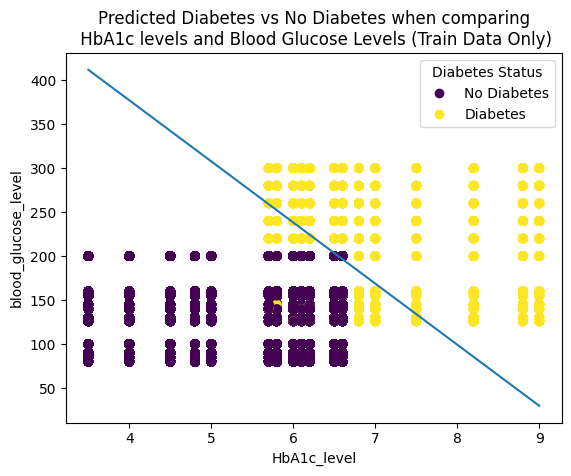

In [18]:
# Plotting train data scatter

plt.scatter(X_train.HbA1c_level, X_train.blood_glucose_level, c = Y_train)
plt.plot(predictionLineX, predictionLineY)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Predicted Diabetes vs No Diabetes when comparing\n HbA1c levels and Blood Glucose Levels (Train Data Only)")



#### Model Evaluation

---

#### A number of evaluation metrics are available from scikit-learn.metrics that can be used for evaluating the performance of any machine learning model. We will be using the following metrics:
* Confusion matrix
* F1 Score
* ROC curve



In [19]:
#To Do: Calculate the Confusion matrix
from sklearn.metrics import confusion_matrix
conMatrix = confusion_matrix(Y_prediction, Y_test)
conMatrix

array([[22752,   963],
       [  166,  1119]])

In [20]:
#To Do: Calculate F1 score based on the Confusion matrix
from sklearn.metrics import f1_score
FP = (conMatrix.sum(axis=0) - np.diag(conMatrix))[1] # False Postives, False Negatives, True Positives, and True Negative in dataset
FN = (conMatrix.sum(axis=1) - np.diag(conMatrix))[1]
TP = (np.diag(conMatrix))[1]
TN = conMatrix.sum() - (FP + FN + TP)
f1Score = 2*TP / ((2*TP) + FP + FN)
f1Score, FP, FN, TP, TN


(np.float64(0.6646866646866647),
 np.int64(963),
 np.int64(166),
 np.int64(1119),
 np.int64(22752))

{np.float64(0.7651103810025116)}


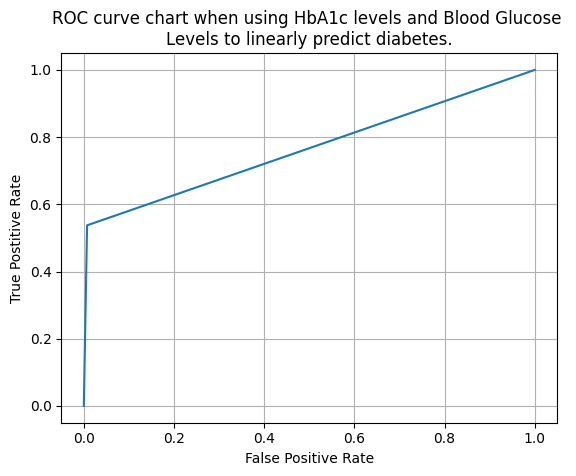

In [43]:
#To Do: Plot the ROC curve with proper annotation
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_prediction)
fpr,tpr,thresholds
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitive Rate')
plt.title("ROC curve chart when using HbA1c levels and Blood Glucose \nLevels to linearly predict diabetes.")
plt.grid(True)
print({roc_auc_score(Y_test, Y_prediction)})


### Train and evaluate using all six features (30 points)

Now let's repeat the above experiment, using all six features instead of two.
Except the decision boundary and feature scatter plot, you should repeat all the steps from above in new cells below this.

In [22]:
# Not needing to do: Download data (Already did it), Print+Check shape of data
# (Has not changed at all), print out initial distribution and example plot (not relavent)


#To Do: Split the dataset
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(features, labels, test_size=0.25)


#To Do: Check the shapes
X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape
X_train2, X_test2, Y_train2, Y_test2




(        age  hypertension  heart_disease    bmi  HbA1c_level  \
 85214  35.0             0              0  24.06          6.2   
 81330  57.0             0              0  22.01          5.8   
 94084  14.0             0              0  25.05          4.5   
 83819  76.0             1              0  24.44          5.7   
 18039  80.0             0              0  27.32          4.8   
 ...     ...           ...            ...    ...          ...   
 57712  65.0             0              0  27.86          6.6   
 77996  25.0             0              0  22.55          6.2   
 52557  66.0             1              0  27.37          6.1   
 96250  80.0             1              0  30.68          5.7   
 69560  80.0             0              1  24.67          3.5   
 
        blood_glucose_level  
 85214                  130  
 81330                  140  
 94084                  200  
 83819                  130  
 18039                  160  
 ...                    ...  
 57712  

In [23]:
#Checking Dist with same methods as previously mentioned

pd.DataFrame(X_train2.index).quantile([0.25, 0.5, 0.75]), pd.DataFrame(X_test2.index).quantile([0.25, 0.5, 0.75])
pd.Series(Y_train2.index).quantile([0.25, 0.5, 0.75]), pd.Series(Y_test2.index).quantile([0.25, 0.5, 0.75])

DiabetesTrainProp = Y_train2.sum() / 75000
DiabetesTestProp = Y_test2.sum() / 25000
DiabetesDatasetProp = labels.sum() / 100000
print((f"""Positive Diabetes Proportion for Total/Train/Test datasets: \n{DiabetesTestProp}
{DiabetesTestProp}\n{DiabetesDatasetProp}"""))

Positive Diabetes Proportion for Total/Train/Test datasets: 
0.08624
0.08624
0.085


In [24]:
# Complete Regression with full feautures dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ^ 100 iterations is too small with the full features dataset
DiabetesRegression2 = LogisticRegression(max_iter=2000).fit(X_train2, Y_train2)
Y_prediction2 = DiabetesRegression2.predict(X_test2)
Y_prediction2
DiabetesRegression2.score(X_test2, Y_test2)

0.95784

#### Performance Comparison

Finally, compare their performances (2-feature model vs 6-feature model) discussing the calculated metrics.

In [25]:
#To Do: Calculate the Confusion matrix
conMatrix2 = confusion_matrix(Y_prediction2, Y_test2)
print(f"Confusion matrix with 2 features: {conMatrix}\nConfusion matrix with 6 features: {conMatrix2}")

# Both confusion matrices have similar values, and we can see that while out of the 25k tested datapoints
# for both models, the TN and FN of our 2 features model outperforms our 6 feature model, we can see that
# for the FP, and TP have better values with our 6 feature model.

Confusion matrix with 2 features: [[22752   963]
 [  166  1119]]
Confusion matrix with 6 features: [[22629   839]
 [  215  1317]]


In [28]:
#To Do: Calculate F1 based on Confusion matrix

FP2 = (conMatrix2.sum(axis=0) - np.diag(conMatrix2))[1] # False Postives, False Negatives, True Positives, and True Negative in dataset
FN2 = (conMatrix2.sum(axis=1) - np.diag(conMatrix2))[1]
TP2 = (np.diag(conMatrix2))[1]
TN2 = conMatrix2.sum() - (FP2 + FN2 + TP2)
f1Score2 = 2*TP2 / ((2*TP2) + FP2 + FN2)

print(f"F1 score with 2 features: {f1Score}\nF1 score with 6 features: {f1Score2}")

# We see a significant increase in our F1 score when incorporating all 6 feaures compared to with just 2.

F1 score with 2 features: 0.6646866646866647
F1 score with 6 features: 0.7142082429501084


{np.float64(0.8007208852882615)}


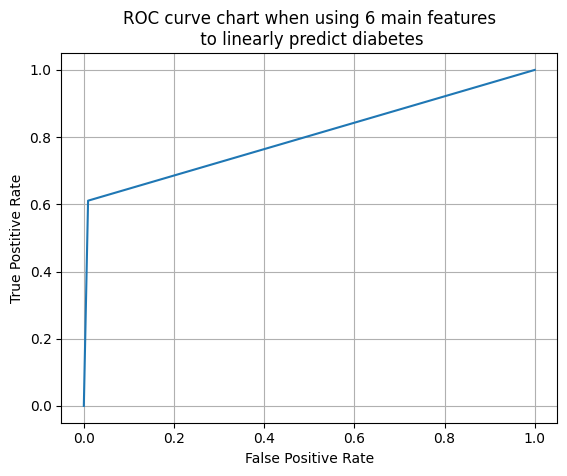

In [44]:
# Roc Curve
fpr2, tpr2, thresholds2 = roc_curve(Y_test2, Y_prediction2)
fpr2,tpr2,thresholds2
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitive Rate')
plt.title("ROC curve chart when using 6 main features\n to linearly predict diabetes")
plt.grid(True)
print({roc_auc_score(Y_test2, Y_prediction2)})

# The ROC curve with our 6 feature model outperforms our 2 feature model. We can see
# the 2 feature model plateu around 55% TPR wheras our 6 feature model plateus
# at around 60% TPR.


Proven with the Confusion Matrix, F1scores, and the ROC curve, we see that including all 6 features instead of our initial 2 increases the consistancy of our linear regression model.

### Use of Generative AI (5 points)

**1. Did you get any help from any Generative AI tools (e.g., ChatGPT) for completing this assignment task? Please explain.** (1 points)

Your response:

$~$
No, I did not use generative AI at any point in my assignment. I disabled Gemani's AI that is imbedded into Colab as well. My main resources to complete the assignment was the Linear Regression workbooks, notes from class to help with concepts and formulas, GeeksforGeeks for python code implementation (such as graph creation), as well as https://scikit-learn.org, https://scipy-lectures.org, and https://matplotlib.org for machine learning and python plot assistance. No code was directly copied, just referenced.

Some resources I used:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_likelihood_ratios.html

https://www.geeksforgeeks.org/python/line-chart-in-matplotlib-python/

https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

**2. What prompts did you use to get assistance from Generative AI? Please list all the prompts that you used.
If you didn't get any Generative AI assistance, simply write the following text to respond this question.** (3 points)

$~$ I didn't seek any Generative AI assistance to complete this assignment task.


**3. How would you distribute credit between you and the Generative AI tool? Please give the percentage of your contribution and the contribution of Generative AI.** (1 points)

$~$  0% to generative AI, 100% to myself.

### Discussion with Others (5 points)

**1. Did you have (any level of discussion) with someone else in the class for completing this assignment task? Please explain.** (5 points)

Slightly, I did talk to another student but the discussion was not on the assignment, but rather implementation of the code in Colab (Connecting to a Github Repo for a copy of the work, and turning off Gemini in the Tools section, as well as the general difficulty of the assignment). No mention of actual implementation was discussed.